In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
goalscorers = pd.read_csv('goalscorers.csv')
results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')

In [3]:
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [4]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [6]:
goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [7]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47777 entries, 0 to 47776
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47777 non-null  object
 1   home_team   47777 non-null  object
 2   away_team   47777 non-null  object
 3   home_score  47777 non-null  int64 
 4   away_score  47777 non-null  int64 
 5   tournament  47777 non-null  object
 6   city        47777 non-null  object
 7   country     47777 non-null  object
 8   neutral     47777 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [8]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           645 non-null    object
 1   home_team      645 non-null    object
 2   away_team      645 non-null    object
 3   winner         645 non-null    object
 4   first_shooter  230 non-null    object
dtypes: object(5)
memory usage: 25.3+ KB


In [9]:
# Resposta 1: Lunar New Year Cup & King's Cup  
brasil_resultado = results[(results['home_team'] == 'Brazil') | (results['away_team'] == 'Brazil')]

brasil_resultado['winner'] = 'Draw'
brasil_resultado.loc[brasil_resultado['home_score'] > brasil_resultado['away_score'], 'winner'] = brasil_resultado['home_team']
brasil_resultado.loc[brasil_resultado['away_score'] > brasil_resultado['home_score'], 'winner'] = brasil_resultado['away_team']

brasil_internacional = brasil_resultado[brasil_resultado['tournament'] != 'Friendly']

jogo_total_competicao = brasil_internacional['tournament'].value_counts()

brasil_vitoria = brasil_internacional[brasil_internacional['winner'] == 'Brazil']
vitoria_competicao = brasil_vitoria['tournament'].value_counts()

brasil_vitoria_pp = vitoria_competicao / jogo_total_competicao

brasil_mais_vitoria = brasil_vitoria_pp.sort_values(ascending=False)

print(brasil_mais_vitoria)

Lunar New Year Cup              1.000000
King's Cup                      1.000000
Brazil Independence Cup         0.750000
Confederations Cup              0.696970
Pan American Championship       0.687500
Copa Oswaldo Cruz               0.687500
FIFA World Cup                  0.666667
FIFA World Cup qualification    0.635036
Atlantic Cup                    0.600000
Copa Bernardo O'Higgins         0.600000
Gold Cup                        0.571429
Copa América                    0.558974
Rous Cup                        0.500000
Superclásico de las Américas    0.500000
Copa Roca                       0.478261
Copa Rio Branco                 0.444444
Mundialito                      0.333333
Tournoi de France               0.333333
USA Cup                         0.333333
Name: tournament, dtype: float64


C:\Users\migue\AppData\Local\Temp\ipykernel_3812\4112361266.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brasil_resultado['winner'] = 'Draw'


In [10]:
# Pergunta 2:
results['winner'] = 'Draw'
results.loc[results['home_score'] > results['away_score'], 'winner'] = results['home_team']
results.loc[results['away_score'] > results['home_score'], 'winner'] = results['away_team']

results_international = results[results['tournament'] != 'Friendly']

vitoria_time_competicao = results_international[results_international['winner'] != 'Draw'].groupby(['tournament', 'winner']
).size().reset_index(name='win_count')

vitoria_competicao = vitoria_time_competicao.loc[vitoria_time_competicao.groupby('tournament')['win_count'].idxmax()]

print(vitoria_competicao)

                           tournament       winner  win_count
3                     ABCS Tournament     Suriname          7
10                      AFC Asian Cup         Iran         45
45        AFC Asian Cup qualification         Iran         36
94                  AFC Challenge Cup  North Korea         11
115   AFC Challenge Cup qualification  Philippines          7
...                               ...          ...        ...
1855                   Viva World Cup      Padania         13
1864                WAFF Championship         Iran         19
1878                 West African Cup        Ghana         16
1885      Windward Islands Tournament      Grenada         25
1889                  World Unity Cup  Tamil Eelam          2

[169 rows x 3 columns]


C:\Users\migue\AppData\Local\Temp\ipykernel_3812\653370359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brasil_resultado['decade'] = pd.to_datetime(brasil_resultado['date']).dt.year // 10 * 10


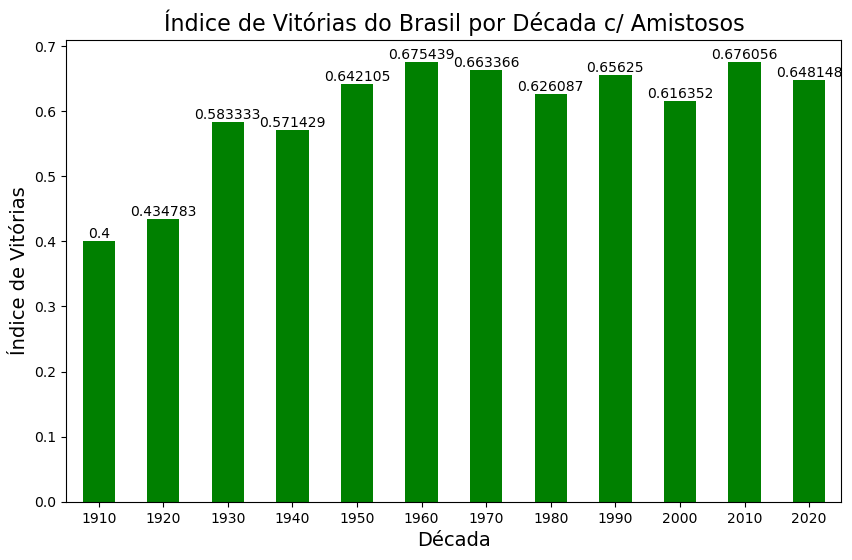

In [15]:
# Pergunta 3: Década de 2010
brasil_resultado['decade'] = pd.to_datetime(brasil_resultado['date']).dt.year // 10 * 10

brasil_vitoria_decada = brasil_resultado[brasil_resultado['winner'] == 'Brazil'].groupby('decade').size()

total_jogos_decada = brasil_resultado.groupby('decade').size()

brasil_vitoria_pp = brasil_vitoria_decada / total_jogos_decada

plt.figure(figsize=(10, 6))
brasil_vitoria_pp.plot(kind='bar', color='green')
plt.title('Índice de Vitórias do Brasil por Década c/ Amistosos', fontsize=16)
plt.xlabel('Década', fontsize=14)
plt.ylabel('Índice de Vitórias', fontsize=14)
plt.bar_label(plt.gca().containers[0])
plt.xticks(rotation=0)
plt.show()

In [12]:
# Pergunta 4: Argentina
brasil_derrota = brasil_resultado[(brasil_resultado['winner'] != 'Brazil') & (brasil_resultado['winner'] != 'Draw')]

derrota_agrup_times = brasil_derrota['winner'].value_counts()

time_mais_venceu_brasil = derrota_agrup_times.idxmax()

contagem_vitorias = derrota_agrup_times.max()

print(f"O time que mais venceu o Brasil é a {time_mais_venceu_brasil} com {contagem_vitorias} vitórias.")

O time que mais venceu o Brasil é a Argentina com 40 vitórias.


In [13]:
# Pergunta 5: Neymar
brasil_penalti = goalscorers[(goalscorers['team'] == 'Brazil') & (goalscorers['penalty'] == True)]

brasil_penalti_marcardor = brasil_penalti['scorer'].value_counts()

print(brasil_penalti_marcardor.head(1))

Neymar    8
Name: scorer, dtype: int64


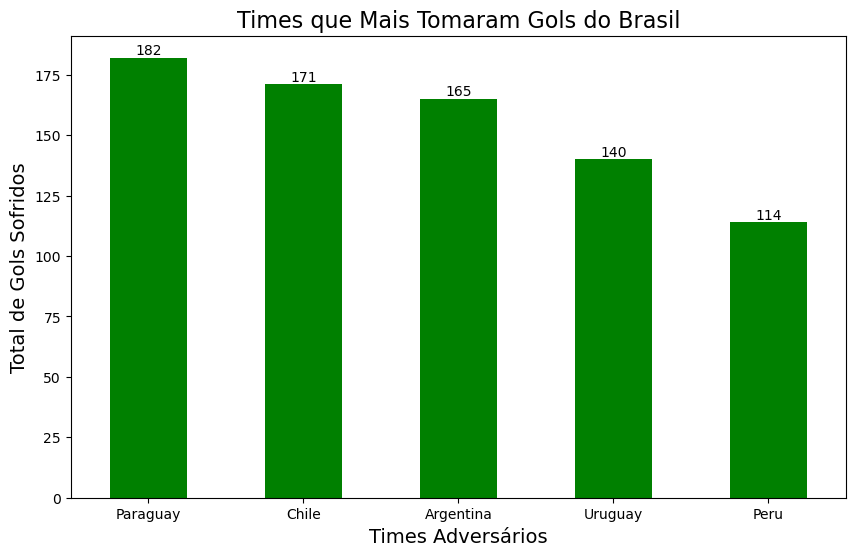

In [14]:
# Pergunta 6: Paraguay; Chile; Argentina; Uruguay; Peru
brasil_jogo_casa = brasil_resultado[brasil_resultado['home_team'] == 'Brazil']

brasil_jogo_visitante = brasil_resultado[brasil_resultado['away_team'] == 'Brazil']

gols_sofrido_casa = brasil_jogo_casa.groupby('away_team')['home_score'].sum()

gols_sofrido_visitante = brasil_jogo_visitante.groupby('home_team')['away_score'].sum()

total_gol_sofrido = gols_sofrido_casa.add(gols_sofrido_visitante, fill_value=0)

top_5_times = total_gol_sofrido.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_5_times.plot(kind='bar', color='green')
plt.title('Times que Mais Tomaram Gols do Brasil', fontsize=16)
plt.xlabel('Times Adversários', fontsize=14)
plt.ylabel('Total de Gols Sofridos', fontsize=14)
plt.bar_label(plt.gca().containers[0])
plt.xticks(rotation=0)
plt.show()